# Regressão Logística I
## Tarefa II

Vamos trabalhar com a mesma base do exercício anterior, mas vamos aprofundar um pouco mais a nossa regressão.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

from sklearn.metrics import roc_curve
from sklearn import metrics

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df['flag_doente'] = (df['num']!=0).astype('int64')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          303 non-null    float64
 1   sex          303 non-null    float64
 2   cp           303 non-null    float64
 3   trestbps     303 non-null    float64
 4   chol         303 non-null    float64
 5   fbs          303 non-null    float64
 6   restecg      303 non-null    float64
 7   thalach      303 non-null    float64
 8   exang        303 non-null    float64
 9   oldpeak      303 non-null    float64
 10  slope        303 non-null    float64
 11  ca           303 non-null    object 
 12  thal         303 non-null    object 
 13  num          303 non-null    int64  
 14  flag_doente  303 non-null    int64  
dtypes: float64(11), int64(2), object(2)
memory usage: 35.6+ KB


In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


1. Considere o script que monta a análise bivariada que você fez na tarefa anterior. Transforme esse script em uma função, que deve:
- Ter como parâmetros de entrada:
    - Um *dataframe* contendo os dados a serem avaliados
    - Um *string* contendo o nome da variável resposta
    - Um *string* contendo o nome da variável explicativa
- E deve retornar um *dataframe* com os dados da bivariada. 
**Monte** a mesma bivariada pelo menos três variáveis qualitativas do *data-frame*. Qual delas parece discriminar mais o risco?

In [5]:
def bivariada(df, var_explicativa, var_resposta):
    tab_1 = pd.crosstab(df[var_explicativa], df[var_resposta], margins=True)
    tab_1['probabilidade'] = tab_1[1] / tab_1['All']  # calcula a probabilidade
    tab_1['odds'] = tab_1[1] / tab_1[0]  # calcula as odds
    tab_1['odds_ratio'] = tab_1['odds'] / tab_1.loc['All', 'odds']  # calcula as odds ratio
    return tab_1


In [6]:
bivariada(df, 'restecg', 'flag_doente')

flag_doente,0,1,All,probabilidade,odds,odds_ratio
restecg,,,,,,
0.0,95,56,151,0.370861,0.589474,0.695494
1.0,1,3,4,0.750000,3.000000,3.539568
2.0,68,80,148,0.540541,1.176471,1.388066
All,164,139,303,0.458746,0.847561,1.000000


In [7]:
bivariada(df, 'slope', 'flag_doente')

flag_doente,0,1,All,probabilidade,odds,odds_ratio
slope,,,,,,
1.0,106,36,142,0.253521,0.339623,0.400706
2.0,49,91,140,0.650000,1.857143,2.191161
3.0,9,12,21,0.571429,1.333333,1.573141
All,164,139,303,0.458746,0.847561,1.000000


In [8]:
bivariada(df, 'cp', 'flag_doente')

flag_doente,0,1,All,probabilidade,odds,odds_ratio
cp,,,,,,
1.0,16,7,23,0.304348,0.437500,0.516187
2.0,41,9,50,0.180000,0.219512,0.258993
3.0,68,18,86,0.209302,0.264706,0.312315
4.0,39,105,144,0.729167,2.692308,3.176536
All,164,139,303,0.458746,0.847561,1.000000


2. Monte uma função semelhante para categorizar variáveis quantitativas contínuas (com muitas categorias) como ```age```.  
    Além dos mesmos parâmetros da função anterior, defina mais um parâmetro como número de categorias que você deseja quebrar. Defina um valor '*default*' de 5 grupos para este parâmetro.  

In [9]:
def bivariada_cat(df, var_explicativa, var_resposta, n_cat = 5):
    df[var_explicativa] = pd.qcut(df[var_explicativa], n_cat, duplicates='drop')
    tab_1 = pd.crosstab(df[var_explicativa], df[var_resposta], margins=True)
    tab_1['probabilidade'] = tab_1[1] / tab_1['All']  # calcula a probabilidade
    tab_1['odds'] = tab_1[1] / tab_1[0]  # calcula as odds
    tab_1['odds_ratio'] = tab_1['odds'] / tab_1.loc['All', 'odds']  # calcula as odds ratio
    return tab_1

In [10]:
bivariada_cat(df, 'age', 'flag_doente')

flag_doente,0,1,All,probabilidade,odds,odds_ratio
age,,,,,,
"(28.999, 45.0]",47,16,63,0.253968,0.340426,0.401653
"(45.0, 53.0]",42,22,64,0.343750,0.523810,0.618020
"(53.0, 58.0]",32,39,71,0.549296,1.218750,1.437950
"(58.0, 62.0]",13,32,45,0.711111,2.461538,2.904261
"(62.0, 77.0]",30,30,60,0.500000,1.000000,1.179856
All,164,139,303,0.458746,0.847561,1.000000


3. Construa um modelo de regressão logística com as variáveis qualitativas: ```sex + cp +  trestbps``` e com a variável quantitativa ```age```.

**Interprete os parâmetros.**

In [11]:
modelo = smf.logit('flag_doente ~ sex + cp + trestbps + C(age)',data=df).fit() # treina o modelo
modelo.summary() 

Optimization terminated successfully.
         Current function value: 0.490504
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      295
Method:                           MLE   Df Model:                            7
Date:                Tue, 05 Nov 2024   Pseudo R-squ.:                  0.2889
Time:                        09:09:38   Log-Likelihood:                -148.62
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 5.381e-23
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         -8.5225      1.402     -6.079      0.000     -11.270      -5.775
C(age)[T.Interval(45.0, 53.0, closed='right')]     0.3047      0.449      0.679      0.497      -0.575       1.185
C(age)[T.Interval(53.0, 58.0, closed='right')]     1.3047      0.447      2.917      0.004       0.428       2.181
C(age)[T.Interval(58.0, 62.0, closed='right')]     2.1651      0.536      4.036      0.000       1.114       3.216
C(age)[T.Interval(62.0, 77.0, closed='right')]     1.2308      0.480      2.565      0.010       0.290       2.171
sex                                                1.8650      0.344      5.424      0.000       1.191       2.539
cp                                                 1.1627      0.173      6.737      0.000       0.824       1.501
trestbps                                           0.0177      0.008      2.133      0.033       0.001       0.034
==================================================================================================================
"""

4. Avalie o seu modelo quanto a **calibragem**:
- Calcule a probabilidade de evento predita segundo o seu modelo
- Categorize essa probabilidade em G=5 grupos
- Calcule a probabilidade de evento predita média por grupo
- Calcule a taxa de eventos (média da variável indicadora de eventos) por grupo
- Compare graficamente o valor eperado versus observado para a taxa de maus por grupo

In [12]:
df['predito'] = modelo.predict(df)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente,predito
0,"(62.0, 77.0]",1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,0.155470
1,"(62.0, 77.0]",1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1,0.887147
2,"(62.0, 77.0]",1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1,0.794539
3,"(28.999, 45.0]",1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,0.296569
4,"(28.999, 45.0]",0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,0.020008


In [13]:
# categoriza a probabilidade em 5 grupos
cat_pred = pd.qcut(df['predito'], 5, duplicates='drop')
cat_pred.value_counts().sort_index()

predito
(0.0119, 0.128]    61
(0.128, 0.326]     60
(0.326, 0.584]     61
(0.584, 0.788]     60
(0.788, 0.96]      61
Name: count, dtype: int64

In [14]:
group_reg = df.groupby(cat_pred)
qualid = group_reg[['flag_doente']].count().rename(columns={'flag_doente':'contagem'})

In [15]:
# media do valor predito
qualid['predito'] = group_reg['predito'].mean()
qualid

,contagem,predito
predito,,
"(0.0119, 0.128]",61,0.066015
"(0.128, 0.326]",60,0.233205
"(0.326, 0.584]",61,0.454085
"(0.584, 0.788]",60,0.679545
"(0.788, 0.96]",61,0.860802


In [16]:
qualid['pct_doentes'] = group_reg['flag_doente'].mean()
qualid

,contagem,predito,pct_doentes
predito,,,
"(0.0119, 0.128]",61,0.066015,0.081967
"(0.128, 0.326]",60,0.233205,0.166667
"(0.326, 0.584]",61,0.454085,0.475410
"(0.584, 0.788]",60,0.679545,0.750000
"(0.788, 0.96]",61,0.860802,0.819672


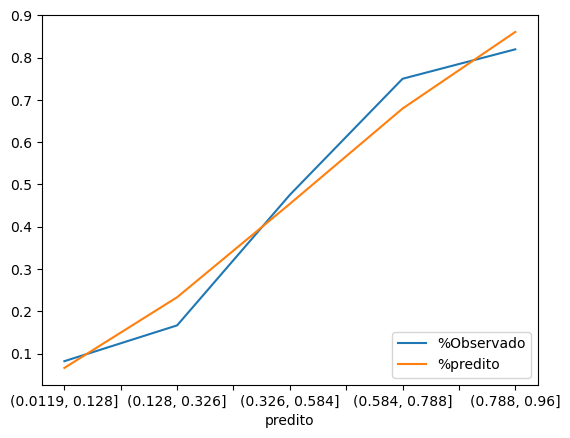

In [17]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax = qualid['pct_doentes'].plot(label = '%Observado')
ax = qualid['predito'].plot(label='%predito')

ax.legend(loc = 'lower right')

5. Avalie o seu modelo quanto a discriminação calculando acurácia, GINI e KS.

In [20]:
from sklearn import metrics
from scipy.stats import ks_2samp

acc = metrics.accuracy_score(df['flag_doente'], df['predito']>.5)
print('Acurácia: {0:.2f}%'.format(acc*100))

#AUC
fpr, tpr, thresholds = metrics.roc_curve(df['flag_doente'], df['predito'])
auc_ = metrics.auc(fpr, tpr)
#Gini
gini = 2*auc_ -1
#KS
ks = ks_2samp(df.loc[df['flag_doente'] == 1, 'predito'], df.loc[df['flag_doente'] != 1, 'predito']).statistic

print('KS: {0:.2f}% \nAUC: {1:.2f}% \nGINI: {2:.2f}%'
      .format(ks*100, auc_*100, gini*100))

Acurácia: 77.89%
KS: 60.61% 
AUC: 84.36% 
GINI: 68.73%


6. tente melhorar o modelo obtido, por exemplo inserindo ou removendo variáveis.  
    Avalie as características do seu modelo (calibragem e acurácia).

In [22]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num', 'flag_doente',
       'predito'],
      dtype='object')

In [45]:
modelo_2 = smf.logit('''flag_doente ~ sex+cp+trestbps
                     +thalach+exang+oldpeak
                     ''', data=df).fit()
modelo_2.summary()


Optimization terminated successfully.
         Current function value: 0.431285
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      296
Method:                           MLE   Df Model:                            6
Date:                Tue, 05 Nov 2024   Pseudo R-squ.:                  0.3747
Time:                        09:27:27   Log-Likelihood:                -130.68
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 3.071e-31
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.6460      1.819     -2.004      0.045      -7.211      -0.081
sex            1.6383      0.362      4.520      0.000       0.928       2.349
cp             0.7928      0.175      4.527      0.000       0.450       1.136
trestbps       0.0227      0.009      2.448      0.014       0.005       0.041
thalach       -0.0274      0.008     -3.435      0.001      -0.043      -0.012
exang          0.9875      0.352      2.807      0.005       0.298       1.677
oldpeak        0.6163      0.157      3.932      0.000       0.309       0.924
==============================================================================
"""

In [46]:
df['predito_2'] = modelo_2.predict(df)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente,predito,predito_2
0,"(62.0, 77.0]",1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,0.155470,0.351392
1,"(62.0, 77.0]",1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1,0.887147,0.977034
2,"(62.0, 77.0]",1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1,0.794539,0.950049
3,"(28.999, 45.0]",1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,0.296569,0.588732
4,"(28.999, 45.0]",0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,0.020008,0.049455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,"(28.999, 45.0]",1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1,0.028089,0.169029
299,"(62.0, 77.0]",1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1,0.855469,0.935064
300,"(53.0, 58.0]",1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1,0.832535,0.936610
301,"(53.0, 58.0]",0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1,0.069997,0.020361


In [47]:
acc = metrics.accuracy_score(df['flag_doente'], df['predito_2']>.5)
print('Acurácia: {0:.2f}%'.format(acc*100))

#AUC
fpr, tpr, thresholds = metrics.roc_curve(df['flag_doente'], df['predito_2'])
auc_ = metrics.auc(fpr, tpr)
#Gini
gini = 2*auc_ -1
#KS
ks = ks_2samp(df.loc[df['flag_doente'] == 1, 'predito_2'], df.loc[df['flag_doente'] != 1, 'predito_2']).statistic

print('KS: {0:.2f}% \nAUC: {1:.2f}% \nGINI: {2:.2f}%'
      .format(ks*100, auc_*100, gini*100))

Acurácia: 80.53%
KS: 61.97% 
AUC: 88.19% 
GINI: 76.37%
